# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
data = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

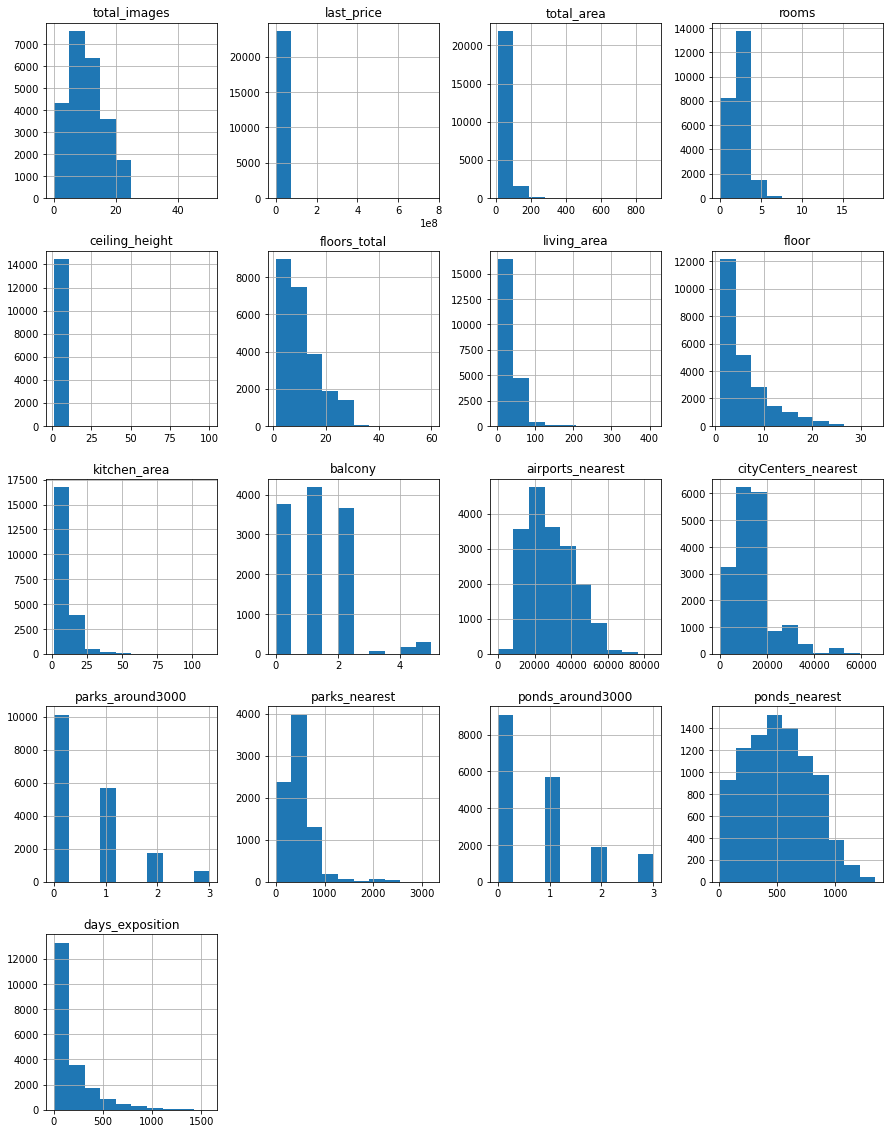

In [5]:
data.hist(figsize=(15, 20), bins = 10)

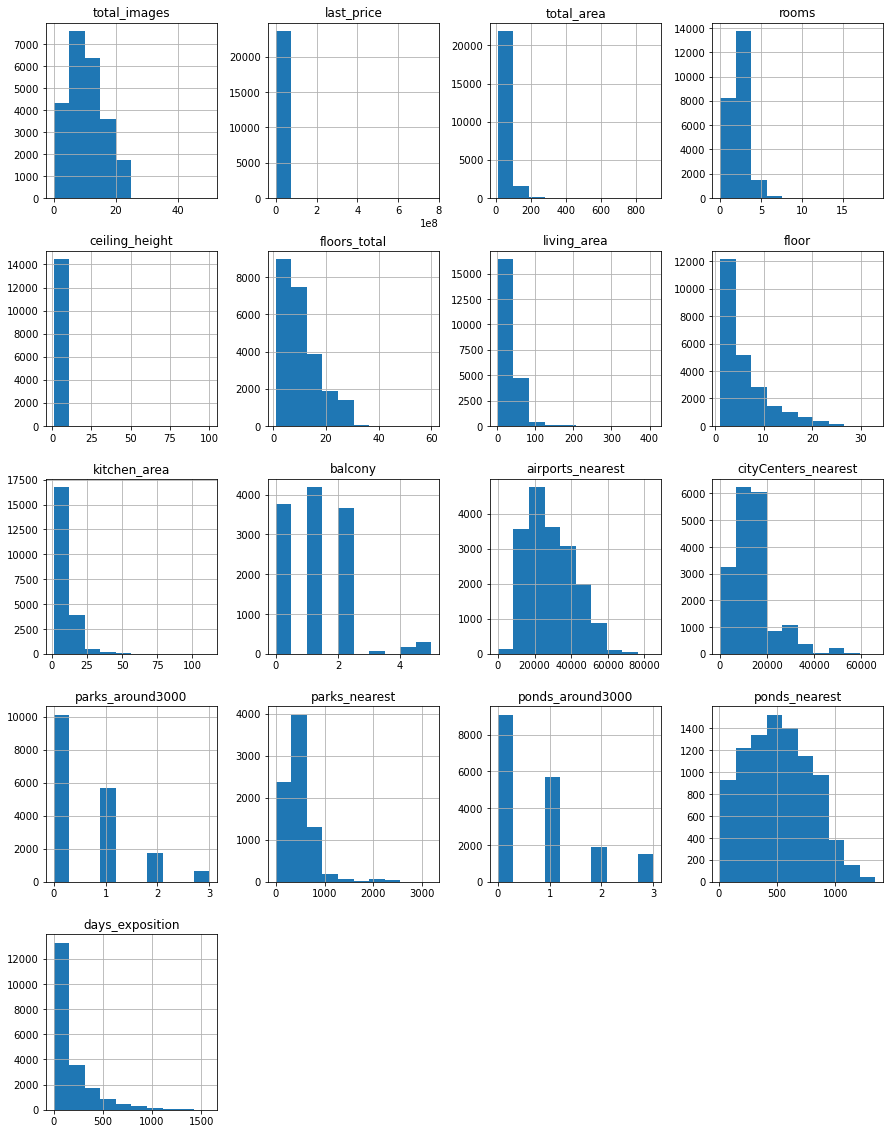

In [6]:
# Код ревьюера

data.hist(figsize=(15, 20), bins = 10)
None

Мини вывод по графикам выше. Количество объявлений имеент восходящую тенденцию по дате. Большая часть квартир в домах, где менее 20 этажей, площадью менее 50 квадратов, без балконов, без парков вокруг и прудов. Большая активность совершений сделок в будни и в месяцы январь и декабрь.

In [7]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка данных

#### Преобразовываю столбцы в другие форматы данных

Преобразовал весь столбец **first_day_exposition** в тип данных дата.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y%m%dT%H:%M:%S')


In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Я предположил, что все объекты с пропущенным значением в **is_apartment** не являются апартаментами. Т.к. человек при заполнении думает,  что надо указать является ли таковым. Преобразовал весь столбец в **bool** и столбец **floors_total** в int

In [10]:
data.loc[data['is_apartment'].isna(),'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Обрабатываю пропуски

В столбцах **parks_around3000, ponds_around3000** все пропуски заменил на 0 в виду отсутсвия объекта (парка или пруда).

In [11]:
data.loc[data['parks_around3000'].isna(),'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(),'ponds_around3000'] = 0

Пропуски в столбце **balcony** заменил на 0, т.к. отсутсвие значения указывает, что балконов нет

In [12]:
data.loc[data['balcony'].isna(),'balcony'] = 0

Пропуски в столбце **floors_total** заменил на 0, т.к. для дайнейшей категоризации важен показатель первый этаж либо последний

In [13]:
data.loc[data['floors_total'].isna(),'floors_total'] = 0

Я поделил высоту столбцов **ceiling_height** выше 10 на 10 и заменил значения в исходном столбце. Заменю пропуски в столбце **ceiling_height** медианным значением

In [14]:
data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,0.0,NaN,0.0,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [15]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

In [16]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [17]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

Пропуски в столбцах **parks_nearest**, **ponds_nearest**, **cityCenters_nearest** заменю медианным значения по каждому населенному пункту

In [18]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform(lambda x : x.median()))

In [19]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].median()

In [20]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].median()

In [21]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].median()

In [22]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        5394
cityCenters_nearest     5394
parks_around3000           0
parks_nearest           6032
ponds_around3000           0
ponds_nearest           5518
days_exposition         3181
dtype: int64

Что сделать с другими пропускам, честно говоря, не знаю =(

#### Обработка дупликатов

Нахожу неявные дупликаты и редактитрую существующий столбец. Я не придумал как можно это автоматизировать, поэтому искал вручную неявные дупликаты и заменял их =/

In [23]:
for i in data.sort_values(by = 'locality_name')['locality_name'].unique():
    if 'город' in str(i) or 'пос' in str(i) or 'дер' in str(i):
        print(i)

Ивангород
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня Бор
деревня Борисова Грива
деревня Ваганово
деревня Вартемяги
деревня Вахнова Кара
деревня Выскатка
деревня Гарболово
деревня Глинка
деревня Горбунки
деревня Гостилицы
деревня Заклинье
деревня Заневка
деревня Зимитицы
деревня Извара
деревня Иссад
деревня Калитино
деревня Кальтино
деревня Камышовка
деревня Каськово
деревня Келози
деревня Кипень
деревня Кисельня
деревня Колтуши
деревня Коркино
деревня К

In [24]:
for i in data.sort_values(by = 'locality_name')['locality_name'].unique():
    if 'Александровская' in str(i):
        print(i)

посёлок Александровская


In [25]:
duplicates = ['городской посёлок Янино-1']
location = 'городской поселок Янино-1'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [26]:
duplicates = ['посёлок Мурино','Мурино']
location = 'поселок Мурино'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [27]:
duplicates = ['Кудрово']
location = 'деревня Кудрово'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [28]:
duplicates = ['Коммунар']
location = 'поселок Коммунары'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [29]:
duplicates = ['посёлок городского типа Красный Бор']
location = 'поселок городского типа Красный Бор'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [30]:
duplicates = ['деревня Фёдоровское']
location = 'городской посёлок Фёдоровское'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [31]:
duplicates = ['посёлок городского типа Лебяжье']
location = 'поселок городского типа Лебяжье'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [32]:
duplicates = ['посёлок городского типа Кузьмоловский']
location = 'поселок городского типа Кузьмоловский'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [33]:
duplicates = ['поселок Рябово','посёлок городского типа Рябово']
location = 'поселок городского типа Рябово'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [34]:
duplicates = ['посёлок Тельмана']
location = 'поселок Тельмана'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [35]:
duplicates = ['городской посёлок Лесогорский']
location = 'поселок городского типа Лесогорский'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [36]:
duplicates = ['городской посёлок Мга']
location = 'посёлок городского типа Мга'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [37]:
duplicates = ['городской посёлок Назия']
location = 'поселок городского типа Назия'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [38]:
duplicates = ['городской посёлок Павлово','село Павлово']
location = 'посёлок городского типа Павлово'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [39]:
duplicates = ['городской посёлок Рощино','посёлок городского типа Рощино']
location = 'поселок городского типа Рощино'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [40]:
duplicates = ['городской посёлок Советский']
location = 'поселок городского типа Советский'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [41]:
duplicates = ['деревня Гарболово']
location = 'поселок Гарболово'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [42]:
duplicates = ['деревня Зимитицы']
location = 'поселок Зимитицы'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [43]:
duplicates = ['деревня Калитино']
location = 'поселок Калитино'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [44]:
duplicates = ['городской поселок Большая Ижора']
location = 'поселок городского типа Большая Ижора'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

In [45]:
duplicates = ['посёлок городского типа Вырица']
location = 'поселок городского типа Вырица'
data['locality_name'] = data['locality_name'].replace(duplicates,location)

Если не указана локация, удаляю всю строку из дф

In [46]:
data = data.dropna(subset=['locality_name'])

Если не указана жил прощадь тоже удаляю всю строку

In [47]:
data = data.dropna(subset=['living_area'])

In [48]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21752.000000,2.175200e+04,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000,20943.000000,21752.000000,16967.000000,16967.000000,21752.000000,16411.000000,21752.000000,16872.000000,18770.000000
mean,10.020642,6.501327e+06,60.073796,2.071396,2.698513,10.622609,34.448356,5.890493,10.514895,0.616495,28848.707786,14285.426239,0.473106,474.464109,0.592543,509.899834,184.745978
std,5.676868,1.087597e+07,34.712520,1.080506,0.239818,6.579521,22.037664,4.866321,5.843227,0.967800,12704.488616,8685.255876,0.749489,232.383388,0.883851,199.361823,221.267454
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18574.500000,9380.000000,0.000000,428.500000,0.000000,466.000000,44.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.500000,13119.000000,0.000000,460.000000,0.000000,503.000000,101.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37311.500000,16293.500000,1.000000,460.000000,1.000000,558.000000,238.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


(0.0, 1000.0)

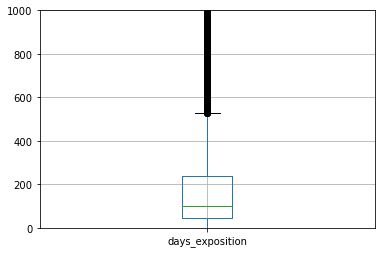

In [49]:
data.boxplot(column= 'days_exposition')
plt.ylim(0,1000)

<AxesSubplot:ylabel='Frequency'>

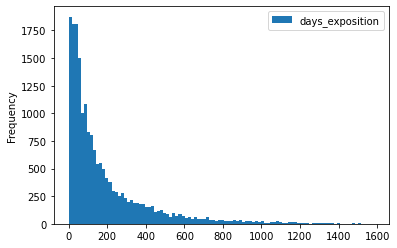

In [50]:
data.plot(y='days_exposition', kind = 'hist', bins = 100)

In [51]:
data.query('days_exposition > 600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23,11,2950000.0,32.0,2016-10-29,1,2.60,9,17.7,9,False,False,False,6.1,0.0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,3502.0,0.0,460.0,1.0,779.0,644.0
42,13,22000000.0,161.8,2015-07-08,4,2.80,4,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28.0,4,False,False,False,7.5,0.0,Санкт-Петербург,15016.0,10822.0,0.0,460.0,1.0,492.0,763.0
61,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,False,False,False,20.0,0.0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,503.0,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,14,10100000.0,78.0,2017-05-12,3,3.27,5,48.6,5,False,False,False,8.2,0.0,Санкт-Петербург,20933.0,1113.0,1.0,621.0,2.0,117.0,621.0
23655,1,2414306.0,40.5,2016-09-08,1,2.56,18,19.6,10,False,False,False,NaN,0.0,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,627.0
23664,5,9000000.0,110.0,2015-12-10,4,3.36,7,64.6,5,False,False,False,15.8,0.0,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0
23672,5,3000000.0,30.8,2016-06-08,1,2.65,5,16.1,3,False,False,False,6.3,0.0,Санкт-Петербург,44614.0,14193.0,2.0,258.0,0.0,503.0,808.0


In [52]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавляю новые столбцы

In [53]:
data['price_per_m'] = data['last_price'] / data['total_area']
data['day_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [54]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['type_floor'] = data.apply(type_floor, axis=1)

#### Перевожу расстояние до центра в м в км и округляю до целых

In [55]:
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000

In [56]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].round(decimals = 0)

Для удобства преобразую столбец **cityCenters_nearest** в формат int

In [57]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')

In [58]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_week,month,year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,19,0.0,NaN,0.0,584.5,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,14,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,<NA>,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34,1.0,352.0,1.0,675.0,239.0,73717.948718,4,8,2016,другой
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,<NA>,0.0,NaN,0.0,NaN,45.0,52542.372881,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,NaN,0.0,село Рождествено,NaN,<NA>,0.0,NaN,0.0,NaN,NaN,44091.710758,6,2,2018,первый


### Проведите исследовательский анализ данных

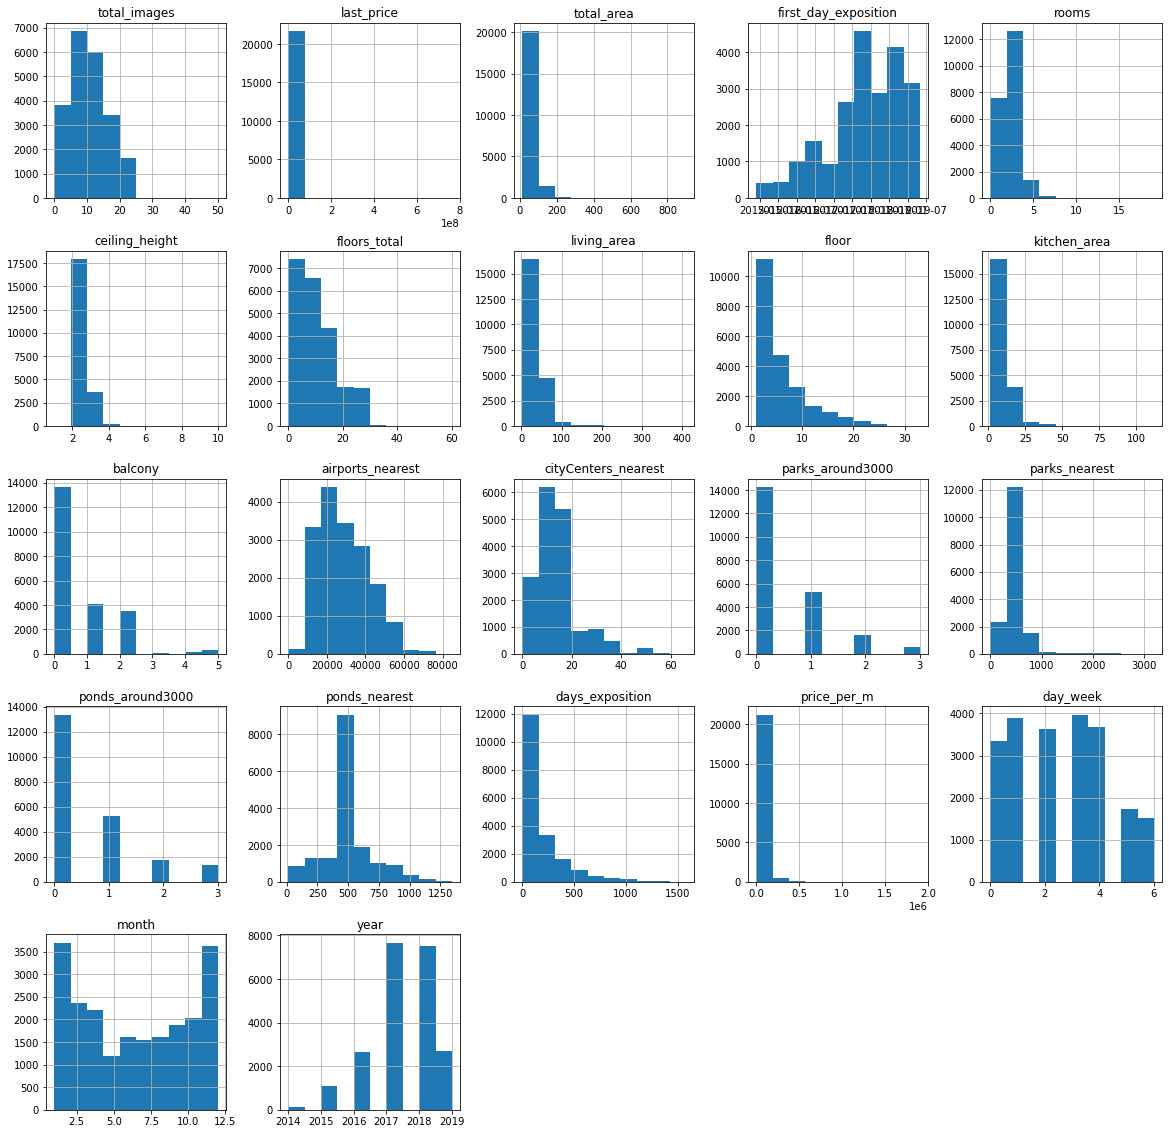

In [59]:
data.hist(figsize=(20, 20))
None

#### Изучаю, как быстро продавались квартиры (столбец days_exposition)

In [60]:
data['days_exposition'].describe()

count    18770.000000
mean       184.745978
std        221.267454
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

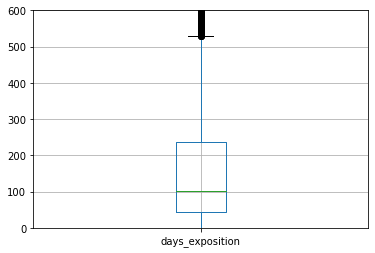

In [61]:
data.boxplot(column= 'days_exposition')
plt.ylim(0,600)

<AxesSubplot:>

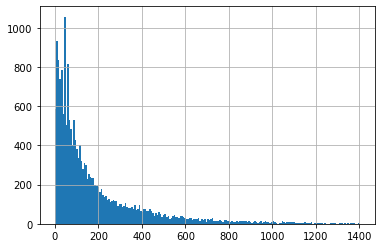

In [62]:
data['days_exposition'].hist(bins = 200, range = (0,1400))

<AxesSubplot:>

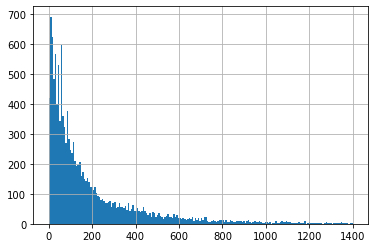

In [63]:
data.query('locality_name == "Санкт-Петербург"')['days_exposition'].hist(bins = 200, range = (0,1400))

Больше всего сделок совершалось в Санкт - Петербурге (что не удивительно, т.к. самый крпный город из перечня).

Из вышепредставленных данных по столбцу **days_exposition** можно предположить, что долгие продажи от 700 дней и больше, т.к. график там практически не изменяется. Быстрые от 45 и меньше.
P.s. можно было бы прировнять границу медленных продаж к квартилю и 75(231), не знаю на сколько это было бы правильным решением.

#### Проверяю какие факторы больше всего влияют на общую (полную) стоимость объекта?
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

In [64]:
#pd.plotting.scatter_matrix(data['last_price','total_area','living_area','kitchen_area','rooms','day_week','month','year','type_floor'], figsize=(9, 9))
correlation_list = list(['last_price','total_area','living_area','kitchen_area','rooms'])
data[correlation_list].corr()
# 'day_week','month','year'

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.641562,0.566517,0.517830,0.361257
total_area,0.641562,1.000000,0.939534,0.609124,0.773481
living_area,0.566517,0.939534,1.000000,0.428773,0.846088
kitchen_area,0.517830,0.609124,0.428773,1.000000,0.270246
rooms,0.361257,0.773481,0.846088,0.270246,1.000000


Что мы видим из таблицы корреляций цены от факторов различных? Мы видим, корреляция наблюдается между ценой и общей площадью, слабее между ценой и жилой площадью,  между ценой и прощадью кухни. Слабая корреляция наблюдается между ценой и количеством комнат. Относительно зависимости между днем недели, месяцем и годом зависимость отсутсвует, что подтверждает распределение данным на графиках ниже.

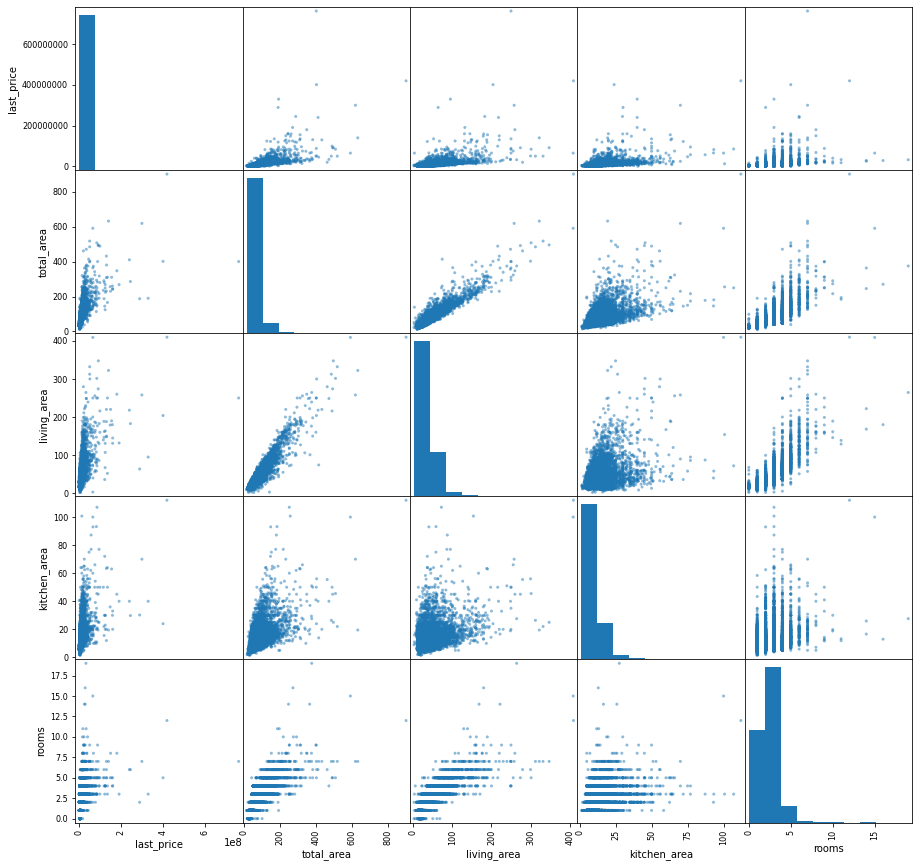

In [65]:
pd.plotting.scatter_matrix(data[correlation_list], figsize=(15, 15))
None

<AxesSubplot:xlabel='day_week'>

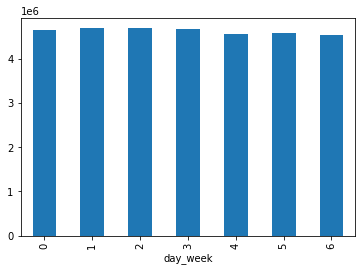

In [66]:
data.groupby('day_week')['last_price'].median().plot(kind = 'bar')

<AxesSubplot:xlabel='month'>

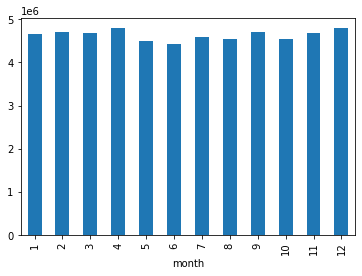

In [67]:
data.groupby('month')['last_price'].median().plot(kind = 'bar')

<AxesSubplot:xlabel='year'>

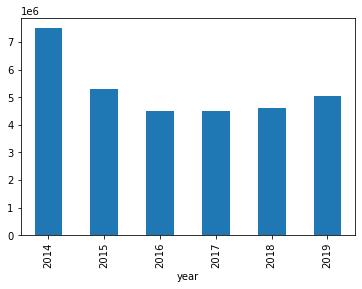

In [68]:
data.groupby('year')['last_price'].median().plot(kind = 'bar')

#### Считаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделяю населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [69]:
pivot_price_per_m = data.pivot_table(index='locality_name', values='price_per_m', aggfunc=['mean','count'])
pivot_price_per_m.columns = ['mean', 'count']
pivot_price_per_m = pivot_price_per_m.sort_values(by = 'count', ascending=False).head(10)
pivot_price_per_m.sort_values(by = 'mean', ascending=False)

,mean,count
locality_name,,
Санкт-Петербург,114203.680655,14581
Пушкин,103428.483885,345
деревня Кудрово,95716.021094,424
посёлок Парголово,90442.587023,301
поселок Мурино,86664.716164,524
Петергоф,84480.969944,197
посёлок Шушары,78886.398893,404
Колпино,75344.096345,328
Всеволожск,68880.131023,371


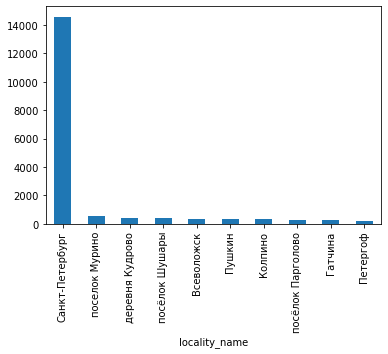

In [70]:
pivot_price_per_m['count'].plot.bar()
None

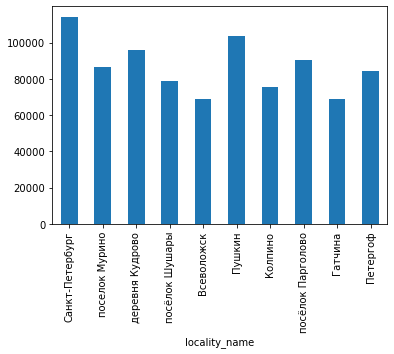

In [71]:
pivot_price_per_m['mean'].plot.bar()
None

Как видим выше наиболее высокая стоимость квадратного метра в Санкт-Петербург, Пушкин, Кудрово. Самая маленькая стоимость в Выборге, Всеволожске и Гатчине

#### Вычисляю среднюю цену каждого километра в Санкт - Петербурге. Нахожу зависимость стоимости зависит от расстояния до центра города

In [72]:
data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].mean()

11.597421301693986

In [73]:
data.query('locality_name == "Санкт-Петербург"')[list(['last_price','cityCenters_nearest'])].corr()

,last_price,cityCenters_nearest
last_price,1.00000,-0.25333
cityCenters_nearest,-0.25333,1.00000


В разрезе данных по городу Санкт - Петербург зависимость между удаленность от центра и ценой слабо отрицательная, т.к. корреляция равна -0.26. Это и подтверждает график снизу. Чем дальше от центра, тем дороже.

<AxesSubplot:xlabel='cityCenters_nearest'>

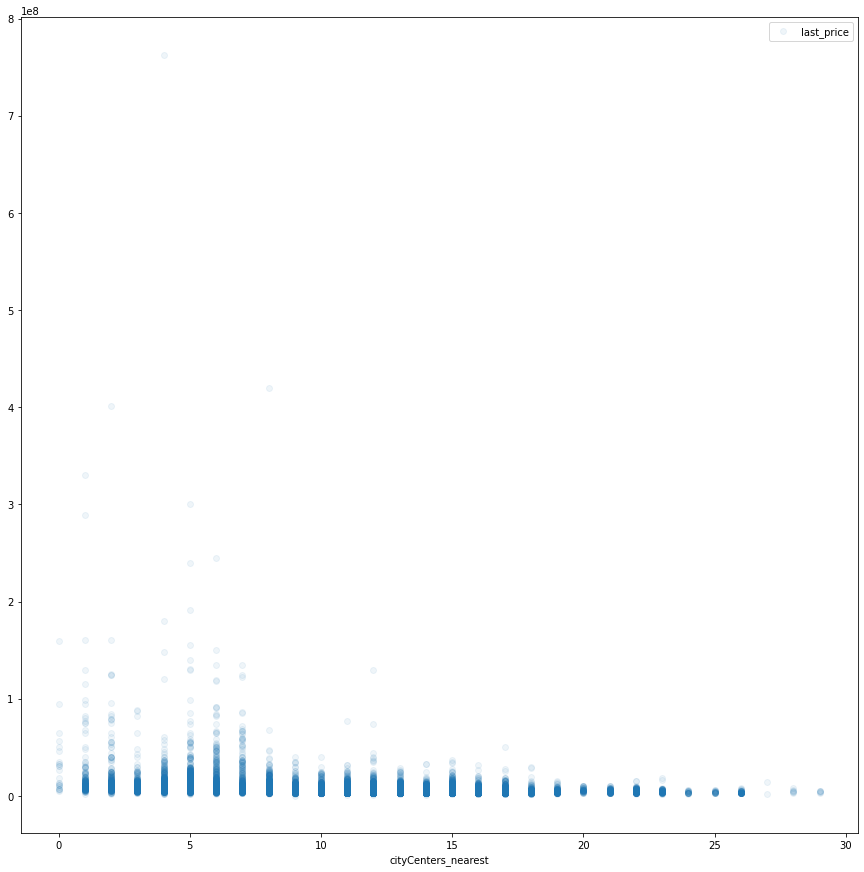

In [74]:
data.query('locality_name == "Санкт-Петербург"').sort_values(by = 'cityCenters_nearest', ascending=True).plot(x="cityCenters_nearest", y="last_price", figsize=(15, 15), style = 'o', alpha=0.07)

### Общий вывод

**Итого**. 
- от месяца и дня недели цена объекта не зависит;
- после 2014 года был упадок цен вплоть до 2017 года с 7млн до 4.2млн соответсвенно. Сейчас габлюдается рост цены и составляет 5млн;
- по длительности продажи 50% всех сделок были совершены в диапазоне от 45 до 231 дней;
- средняя зависимость между между ценой и общей площадью объекта в количестве 0.64;
- слабые зависимости между ценой и жилой площадью,  между ценой и прощадью кухни (0.57 и 0.52 соответсвенно);
- наиболее дорогие квартиры находятся в н.с. Санкт-Петербург, Пушкин, Кудрово от 95 000 до 114 000 соответвенно за кв.м.
- В разрезе данных по городу Санкт - Петербург, зависимость между удаленность от центра и ценой слабо отрицательная, т.к. корреляция равна -0.26. Это и подтверждает график снизу. Чем дальше от центра, тем дороже.

